In [28]:
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv('data/USA_Housing.csv')
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [30]:
data_x= data.iloc[ : , : 1]
data_x.head()

,Avg. Area Income
0,79545.458574
1,79248.642455
2,61287.067179
3,63345.240046
4,59982.197226


In [31]:
data_y = data.iloc[ : ,5:6]
data_y.head()

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05


In [32]:
data_tout = pd.concat([data_x, data_y], axis = 1)
data_tout

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


# analyse des data 

In [33]:
data_tout.isnull().sum()

Avg. Area Income    0
Price               0
dtype: int64

In [34]:
data_tout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg. Area Income  5000 non-null   float64
 1   Price             5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


# division des datas 

In [35]:
x = data_tout.iloc[ : , : -1].values
y = data_tout.iloc[ : ,  -1].values

In [36]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test =  train_test_split(x, y,  test_size = 0.25, random_state = 20)


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
print("x_train shape :", x_train.shape) 
print("x_test shape :", x_test.shape) 
print("y_train shape :", y_train.shape) 
print("y_test shape :", y_test.shape)

x_train shape : (3750, 1)
x_test shape : (1250, 1)
y_train shape : (3750,)
y_test shape : (1250,)


In [41]:
modele_linear =  LinearRegression()

In [42]:
modele_linear.fit(x_train, y_train)

LinearRegression()

In [43]:
y_score_predits = modele_linear.predict(x_test)

In [44]:
y_score_predits

array([1561769.90985314, 1411102.44989436, 1084734.29318646, ...,
       1133841.31542332,  878420.21345925,  894686.75013863],
      shape=(1250,))

In [45]:
resultats =  pd.DataFrame(y_test, y_score_predits)

In [46]:
resultats

,0
1.561770e+06,1.789099e+06
1.411102e+06,1.584440e+06
1.084734e+06,8.942036e+05
1.032386e+06,1.006886e+06
1.266527e+06,6.194075e+05
...,...
1.473592e+06,1.958065e+06
1.166283e+06,7.178254e+05
1.133841e+06,8.412362e+05
8.784202e+05,1.086072e+06


In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
print(" le MSE de la regresion lineaire:", mean_squared_error(y_test, y_score_predits))

 le MSE de la regresion lineaire: 71850485804.81778


In [49]:
print(" le R2-score de la regresion lineaire:", r2_score(y_test, y_score_predits))

 le R2-score de la regresion lineaire: 0.4023469459381206


In [50]:
import matplotlib.pyplot  as plt

<function matplotlib.pyplot.show(close=None, block=None)>

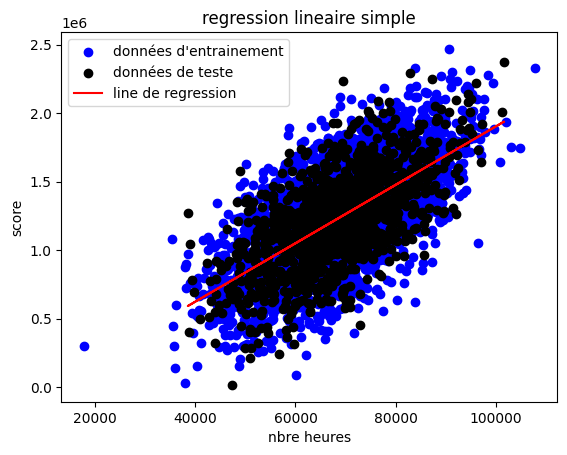

In [51]:
plt.scatter(x_train, y_train, color= 'blue', label= "données d'entrainement")
plt.scatter(x_test, y_test, color= 'black', label= "données de teste")

plt.plot(x_test, y_score_predits, color='red', label= 'line de regression')

plt.xlabel('nbre heures')
plt.ylabel('score')
plt.title('regression lineaire simple')
plt.legend()


plt.show

In [52]:

resultats = pd.DataFrame({'y-score-reel':y_test, 'y-score predits': y_score_predits})
resultats

,y-score-reel,y-score predits
0,1.789099e+06,1.561770e+06
1,1.584440e+06,1.411102e+06
2,8.942036e+05,1.084734e+06
3,1.006886e+06,1.032386e+06
4,6.194075e+05,1.266527e+06
...,...,...
1245,1.958065e+06,1.473592e+06
1246,7.178254e+05,1.166283e+06
1247,8.412362e+05,1.133841e+06
1248,1.086072e+06,8.784202e+05


In [53]:
print (modele_linear.predict([[7.322]]))

[-230651.89132104]
